#                           Data Preparation and Customer Analytics

## Introduction

This is a `Data preparation` and `Customer analytics` project to be carried out by Quantium’s retail analytics team. The project is being done at the behest of our client, the `Category Manager of Chips`, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from this project will be feed into the supermarket’s strategic plan for the chip category in the next half year.

## Objective

The Objective of this Data Analysis is to find out the following:

- Who spends the most on `chips (total sales)`, `describing customers by lifestage` and `how premium their general purchasing behaviour is`
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment
- The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips 
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips
- Visualize significant findings

## Steps taken 

- `Source` and `Extract` raw data
- `Import` needed libraries
- `Load` the required Datasets
- `Cleaning` and Manipulation of the Datasets
- Perform `Exploratory Data Analysis` on the Datasets
- `Merge Dataframes` and `Create new columns` were necessary
- Visualize using either `Python` or `Tableau`

## Tools used

The tools used for Data cleaning, Manipulation, Analysis and Visualization are:

- `Excel`
- `Python`
- `Tableau`
- `ChatGPT`(For code debugging and help with running very complex and complicated lines of code)

In [1]:
## Import necessary libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr


# Settings to produce nice plots in a Jupyter notebook

plt.style.use('seaborn')
%matplotlib inline

from scipy import stats
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re

In [2]:
# Reading csv files containing the both transaction and customer purchase behaviour datasets

df = pd.read_csv(r"C:\Users\goodn\OneDrive\Desktop\FORAGE INTERSHIP\QVI_transaction_data.csv")
df2  = pd.read_csv(r"C:\Users\goodn\OneDrive\Desktop\FORAGE INTERSHIP\QVI_purchase_behaviour.csv")

# Convert Date Column to datetime format

df['DATE'] = pd.to_datetime(df['DATE'])

# Remove timestamp from Date column

df['DATE'] = df['DATE'].dt.date

# Convert Date Column back to datetime format

df['DATE'] = pd.to_datetime(df['DATE'])

## Understanding both Datasets

In [3]:
# Summary basic information of the Transaction Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [4]:
# Showing the first 5 rows of the transaction data

df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny Sea Salt 175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream & Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chps Hny & Jlpno Chili 150g,3,13.8


In [5]:
# Showing the last 5 rows of the transaction data

df.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli & Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


## Checking the shape of both Datasets

In [6]:
# Showing the shape of the Transaction data

df.shape

(264836, 8)

In [7]:
# Check for column variables name for the Transaction Dataset

df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [8]:
# Count for unique values in each column, and store the results in the Transaction dataset

unique_count = df.nunique()

In [9]:
unique_count

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [10]:
# Checking for uniques values in Product Name column

df["PROD_NAME"].unique()

array(['Natural Chip Compny Sea Salt 175g', 'CCs Nacho Cheese 175g',
       'Smiths Crinkle Cut Chips Chicken 170g',
       'Smiths Chip Thinly S/Cream & Onion 175g',
       'Kettle Tortilla Chps Hny & Jlpno Chili 150g',
       'Old El Paso Salsa Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour Cream & Chives 210g',
       'Kettle Sensations Siracha Lime 150g', 'Twisties Cheese 270g',
       'WW Crinkle Cut Chicken 175g', 'Thins Chips Light & Tangy 175g',
       'CCs Original 175g', 'Burger Rings 220g',
       'NCC Sour Cream & Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt & Vinegar 175g',
       'Smiths Chip Thinly Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai 

In [11]:
# Unique values in premium customer column

df2['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [12]:
## Unique values in the life stage column

df2['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

## Cleaning & Manipulating the Dataset

In [13]:
# Detecting & counting missing/null values in the Transaction Dataset

df.isna().sum() 

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [14]:
# Tokenize the text in the column of interest

tokens = word_tokenize(' '.join(df['PROD_NAME'].astype(str)))

In [15]:
# Compute word frequency

fdist = FreqDist(tokens)
most_common_words = fdist.most_common(223)  # Change 10 to the desired number of most common words

In [16]:
most_common_words

[('&', 88617),
 ('175g', 66390),
 ('Chips', 49770),
 ('150g', 43131),
 ('Kettle', 41288),
 ('Salt', 29444),
 ('Smiths', 28860),
 ('Cheese', 27890),
 ('Pringles', 25102),
 ('134g', 25102),
 ('Doritos', 24962),
 ('Crinkle', 23960),
 ('110g', 22387),
 ('Cut', 22194),
 ('Corn', 22063),
 ('Chicken', 21660),
 ('Chip', 21655),
 ('Original', 21560),
 ('Sour', 20178),
 ('170g', 19983),
 ('Salsa', 18094),
 ('Cream', 17019),
 ('Sea', 15613),
 ('Chilli', 15390),
 ('165g', 15297),
 ('300g', 15166),
 ('Sweet', 14302),
 ('Thins', 14075),
 ('Crisps', 12607),
 ('330g', 12540),
 ('Vinegar', 12402),
 ('RRD', 11894),
 ('Infuzions', 11057),
 ('Supreme', 10963),
 ('Chives', 10951),
 ('Dip', 10762),
 ('WW', 10320),
 ('Cobs', 9693),
 ('Popd', 9693),
 ('Tortilla', 9580),
 ('Chps', 9580),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('BBQ', 9434),
 ('Sensations', 9429),
 ('Lime', 9347),
 ('Old', 9324),
 ('El', 9324),
 ('Paso', 9324),
 ('Onion', 9037),
 ('Swt', 7987),
 ('Potato', 7889),
 ('Tomato', 7669),
 ('Thinl

In [17]:
# Excluding items not chips products since we are analysing chips product

word1 = 'Salsa'       # Define the words to search for
word2 = 'Gcamole'

# Filter and Modify the original DataFramethe excluding rows with the multiple words above

df = df[~df['PROD_NAME'].str.contains(f"{word1}|{word2}", case=False, regex=True)]

In [18]:
# Summary statistics of numerical columns in the Transaction Dataset 

df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,243598.000000,2.435980e+05,2.435980e+05,243598.000000,243598.000000,243598.000000
mean,135.054627,1.355356e+05,1.351350e+05,56.678992,1.908058,7.322218
std,76.791910,8.075549e+04,7.815406e+04,33.788067,0.663081,3.094537
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001625e+04,6.757425e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,54.000000,2.000000,7.400000
75%,203.000000,2.030860e+05,2.026628e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


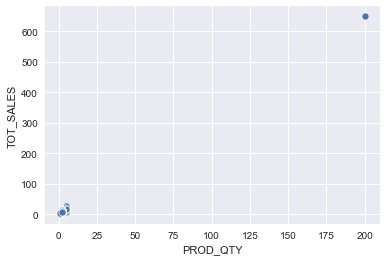

In [19]:
# Visualize using a scatter plot to identify outliers

sns.scatterplot(x = df['PROD_QTY'], y = df['TOT_SALES'])
plt.show()

In [20]:
# Filter the Product Quantity Column of the Transaction dataset to find the outliers as viualized above

df.loc[df['PROD_QTY'] >= 6]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [21]:
# Filtering out the customer based on the loyalty card number and finding out other purchases by the customer

df.loc[df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [22]:
# Filter rows where 'PROD_QTY' is equal to 200

condition = df['PROD_QTY'] == 200

# Drop rows that meet the condition

df.drop(df[condition].index, inplace=True)

In [23]:
# Dropping columns that are redundant and will not be used in the transaction dataset only.

df = df.drop(['PROD_NBR'], axis = 1)

In [24]:
# Remove white spaces in column 'PROD_NAME'

df['PROD_NAME'] = df['PROD_NAME'].str.strip()

In [25]:
# Groupby 'Date', count and sort the number of sales transactions by number of transactions

sales_count_by_date = df.groupby(by='DATE')['TOT_SALES'].count().sort_index(ascending=True)

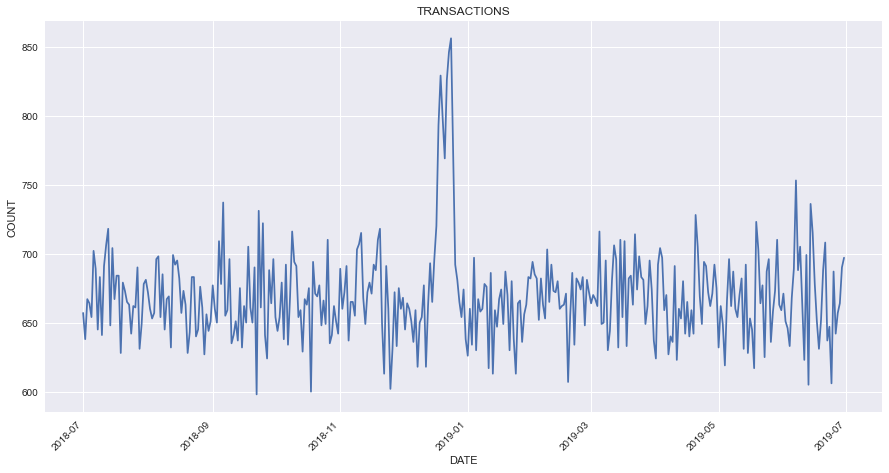

In [26]:
# Plot the transaction count on a line graph

plt.figure(figsize = (15, 8))
sales_count_by_date.plot(kind = 'line')
plt.xlabel('DATE')
plt.ylabel('COUNT')
plt.title('TRANSACTIONS')
plt.xticks(rotation = 45)
plt.show()

In [27]:
# Then extract month and year from 'DATE' column
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year

# Filter for specific month and year
desired_month = 12
desired_year = 2018
filtered_df = df[(df['MONTH'] == desired_month) & (df['YEAR'] == desired_year)]

# Filter,Groupby 'DATE' and count sales transactions for the individual days in December 2018
dec_sales_count_by_date = filtered_df.groupby(by='DATE')['TOT_SALES'].count().sort_index(ascending=True)

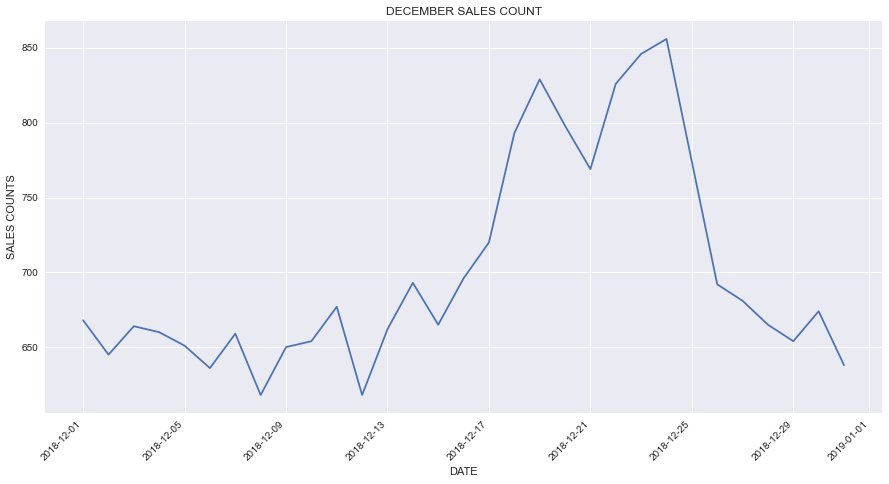

In [28]:
# Plotting the December Daily Sales Count

plt.figure(figsize =  (15, 8))
dec_sales_count_by_date.plot(kind = 'line')
plt.xlabel('DATE')
plt.ylabel('SALES COUNTS')
plt.title('DECEMBER SALES COUNT')
plt.xticks(rotation = 45)
plt.show()

In [29]:
# Extract the numerical values from the PROD_NAME column and create a New Column PACK_SIZE

df['PACK_SIZE'] = df['PROD_NAME'].str.extract('(\d+)').astype(int)

# Sort the dataframe by new PACK_SIZE column in ascending order

df = df.sort_values('PACK_SIZE')

# Add 'g' to the PACK_SIZE values

df['PACK_SIZE'] = df['PACK_SIZE'].astype(str) + 'g'

In [30]:
# Group by pack size to find out quantity sold per package size

quant_sold_per_package_size = df.groupby(by='PACK_SIZE')['PROD_QTY'].sum()


In [31]:
quant_sold_per_package_size

PACK_SIZE
110g     36835
125g      2730
134g     48019
135g      6212
150g     76662
160g      5604
165g     29051
170g     38088
175g    126467
180g      2764
190g      5673
200g      8425
210g     11962
220g      2970
250g      6069
270g     12049
330g     23999
380g     12273
70g       2855
90g       5692
Name: PROD_QTY, dtype: int64

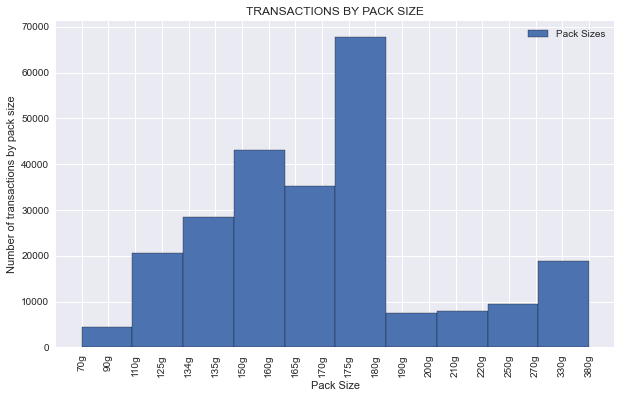

In [32]:
plt.figure(figsize = (10, 6))
plt.title('TRANSACTIONS BY PACK SIZE')
plt.hist(df['PACK_SIZE'], edgecolor='black',bins=10,label='Pack Sizes')
plt.legend(loc='upper right')
plt.xlabel('Pack Size')
plt.ylabel('Number of transactions by pack size')
plt.xticks(rotation = 90)
plt.show()

In [33]:
# Make some corrections on some of the products brand name

df = df.replace({'Infuzions Mango Chutny Papadums':'Infuzions Mango Chutney Poppadoms','Sunbites Whlegrn Crisps Frch/Onion':'Sunbites Wholegrain Crisps French Onion','Infuzions Sour Cream & Herbs Veg Strws':'Infuzions Sour Cream & Herb Veggie Straws','Cobs Popd Sour Crm & Chives Chips':'Cobs Popd Chips Sour Cream & Chives','Cobs Popd Swt, Chlli & Sr/Cream Chips':'Cobs Popd Sweet Chilli and Sour Cream','Pringles Sthrn Fried Chicken':'Pringles Southern Fried Chicken','Pringles Slt Vingar':'Pringles Salt Vinegar','Pringles Sweet & Spcy BBQ':'Pringles Sweet & Spicy BBQ','Kettle Swt Pot Sea Salt':'Kettle Sweet Potato Sea Salt','Kettle Tortilla Chps Hny & Jlpno Chili':'Kettle Tortilla Chips Honey & Jalapeno Chili','Kettle Sensations Siracha Lime':'Kettle Sensations Sriracha Lime','Smith Crinkle Cut Mac n Cheese':"Smith's Crinkle Cut Mac N Cheese",'Red Rock Deli Steak & Chimuchurri':'Red Rock Deli Steak & Chimichurri','Red Rock Deli SR Slow Rst Pork Belly':'Red Rock Deli SR Slow Roast Pork Belly','Kettle Tortilla Chps Btroot & Ricotta':'Kettle Tortilla Chips Beetroot and Ricotta','Red Rock Deli Sp Salt & Truffle':'Red Rock Deli Special Reserve Sea Salt & Black Truffle','Red Rock Deli Chikn & Garlic Aioli':'Red Rock Deli Chicken & Garlic Aioli','Smiths Crinkle Cut Snag & Sauce':"Smith's Crinkle Cut Snag & Sauce",'Smith Crinkle Cut Bolognese':"Smith's Crinkle Cut Bolognese",'Red Rock Deli Pc Sea Salt':'Red Rock Deli Sea Salt Potato Chips','Smiths Crinkle Cut Chips Chicken':"Smith's Crinkle Cut Chips Chicken",'Smiths Crinkle Cut Chips Barbecue':"Smith's Crinkle Cut Chips Barbecue",'Smiths Crinkle Cut Chips Original':"Smith's Crinkle Cut Chips Original",'Smiths Crinkle Cut Chips Chs & Onion':"Smith's Crinkle Cut Cheese & Onion Potato Chips",'Doritos Mexicana':'Doritos Corn Chips Mexicana','Natural Chip Company Tmato Hrb & Spce':'The Natural Chip Company Tomato Herb & Spice','Natural Chip Company Hony Soy Chckn':'The Natural Chip Company Honey Soy Chicken','Smiths Chip Thinly Cut Original':"Smith's Chip Thinly Cut Original",'Thins Chips Hot & Spicy':'Thins Hot & Spicy Potato Chips','Smiths Chip Thinly Cut Salt/Vinegr':"Smith's Thinly Cut Salt & Vinegar Potato Chips",'NCC Sour Cream & Garden Chives':'The Natural Chip Company Sour Cream & Garden Chives','Thins Chips Originl saltd':'Thins Chips Original salted','Natural Chip Company Sea Salt & Vinegr':'The Natural Chip Company Sea Salt & Vinegar','Smiths Thinly Cut Roast Chicken':"Smith's Thinly Cut Roast Chicken",'Smiths Chip Thinly Cut Original':"Smith's Chip Thinly Cut Original",'Smiths Chip Thinly S/Cream & Onion':"Smith's Thinly Cut Sour Cream & Onion Potato Chips",'Natural Chip Companympny Sea Salt':'The Natural Chip Company Sea Salt','Smiths Thinly Swt Chli & S/Cream':"Smith's Thinly Cut Chips Sweet Chilli & Sour Cream",'Grn Wves Plus Btroot & Chilli Jam':'Sunbites Grain Waves Plus Beetroot Sweet Chilli Jam','Cheetos Chs & Bacon Balls':'Cheetos Cheese & Bacon Balls','Woolworths D/Style Chip Sea Salt':'Woolworths Deli Style Chips Sea Salt','Grain Waves Sweet Chilli':'Sunbites Grain Waves Sweet Chilli','Grain Waves Sour Cream & Chives':'Sunbites Grain Waves Sour Cream & Chives','Smiths Crinkle Original':"Smith's Crinkle Original",'Smiths Crinkle Chips Salt & Vinegar':"Smith's Crinkle Chips Salt & Vinegar",'Smiths Crnkle Chip Orgnl Big Bag':"Smith's Crinkle Chip Original Big Bag",'Dorito Corn Chp Supreme':'Doritos Corn Cheese Supreme','Natural Chip Co Tmato Hrb & Spce':'The Natural Chip Company Tomato Herbs and Spices','Natural Chip Co Hony Soy Chckn':'The Natural Chip Company Honey Soy Chicken','WW Crinkle Cut Chicken':'Woolworths Crinkle Cut Chicken', 'Natural Chip Co Sea Salt & Vinegr':'The Natural Chip Company Sea Salt & Vinegar','WW Crinkle Cut Original':'Woolworths Crinkle Cut Original','Snbts Whlgrn Crisps Cheddar & Mstrd':'Sunbites Wholegrain Crisps Cheddar & Mustard','RRD Chilli & Coconut':'Red Rock Deli Chilli and Coconut Potato Chips', 'RRD Steak & Chimuchurri':'Red Rock Deli Steak & Chimichurri','RRD SR Slow Rst Pork Belly':'Red Rock Deli SR Slow Roast Pork Belly','WW Sour Cream & Onion Stacked Chips':'Woolworths Sour Cream & Onion Stacked Chips','Smiths Crinkle Cut French Onion Dip':"Smith's Crinkle Cut French Onion Dip",'WW Original Stacked Chips':'Woolworths Original Stacked Chips','RRD Salt & Vinegar':'Red Rock Deli Salt & Vinegar','RRD Sweet Chilli & Sour Cream':'Red Rock Deli Chilli & Sour Cream','RRD Honey Soy Chicken':'Red Rock Deli Honey Soy Chicken','RRD Lime & Pepper':'Red Rock Deli Lime & Pepper','RRD Pc Sea Salt':'Red Rock Deli Potato Chips Sea Salt','Smiths Crinkle Cut Salt & Vinegar':"Smith's Crinkle Cut Salt & Vinegar",'Natural Chip Compny Sea Salt':'The Natural Chip Company Sea Salt','WW Original Corn Chips':'Woolworths Original Corn Chips','WW Supreme Cheese Corn Chips':'Woolworths Supreme Cheese Corn Chips','WW D/Style Chip Sea Salt':'Woolworths Deli Style Chips Sea Salt'}, regex = True)

In [34]:
# define a list of brand names

brand_list = ['Infuzions','Sunbites', "Smith's" ,'Doritos','Pringles','Cobs Popd','Kettle','Red Rock Deli','The Natural Chip Company','Thins','Burger','Cheezels','CCs','Tostitos','French Fries','Cheetos','Woolworths','Tyrrells','Twisties']

# create a regular expression pattern that matches the brand names

pattern = '|'.join(brand_list)

# extract the brand name from the 'PROD_NAME' column and place it in a new column 'BRAND_NAME'

df['BRAND_NAME'] = df['PROD_NAME'].str.extract(f'({pattern})')

In [35]:
# Final Clean Transaction Dataset

df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,YEAR,PACK_SIZE,BRAND_NAME
206516,2018-07-07,55,55037,48666,Infuzions Mango Chutney Poppadoms 70g,2,4.8,7,2018,70g,Infuzions
55240,2018-08-15,28,28194,25680,Infuzions Mango Chutney Poppadoms 70g,3,7.2,8,2018,70g,Infuzions
225961,2019-03-01,208,208087,206599,Infuzions Mango Chutney Poppadoms 70g,2,4.8,3,2019,70g,Infuzions
68678,2018-08-24,259,259028,257587,Infuzions Mango Chutney Poppadoms 70g,2,4.8,8,2018,70g,Infuzions
55211,2018-08-15,10,10125,9779,Infuzions Mango Chutney Poppadoms 70g,1,2.4,8,2018,70g,Infuzions


In [36]:
# The first rows of the Customers Data

df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [37]:
# Summary basic information of the Customer Dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [38]:
# Summary statistics of numerical columns in the Customer Dataset

df2.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [39]:
# Count for unique values in each column in the Customer Dataset

unique_count = df2.nunique()

In [40]:
unique_count

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [41]:
# Distribution of LIFESTAGE column

df2['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [42]:
# Distribution of PREMIUM_CUSTOMER column

df2['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [43]:
# Merge the Transaction Dataset and Customer Dataset on the LYLTY_CARD_NBR column.

merged_df = pd.merge(df, df2, on='LYLTY_CARD_NBR')

In [44]:
# Check and display duplicates in the mergered table

duplicates = merged_df[merged_df.duplicated(keep=False)]

In [45]:
# Remove duplicates and keeping the first occurrence

merged_df.drop_duplicates(keep='first', inplace=True)

In [46]:
merged_df.isna().sum() 

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
MONTH               0
YEAR                0
PACK_SIZE           0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [47]:
# To calculate the summary of sales by the columns LIFESTAGE and PREMIUM_CUSTOMER in a df

sales_summary = merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

In [48]:
# Calculate total sales

total_sales = sales_summary['TOT_SALES'].sum()

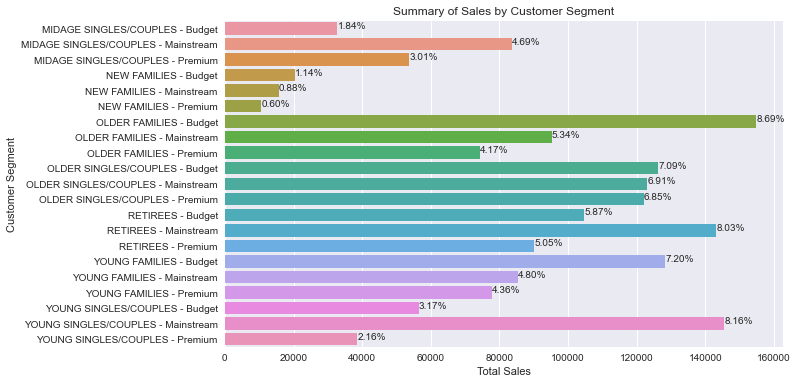

In [49]:
# Plotting a bar chart of the split by these segments to know how each customer segment performed.

plt.figure(figsize=(10, 6))
sns.barplot(y=sales_summary['LIFESTAGE'] + ' - ' + sales_summary['PREMIUM_CUSTOMER'],
            x=sales_summary['TOT_SALES'], orient='h')  # Set orient='h' for horizontal chart
plt.xlabel('Total Sales')
plt.ylabel('Customer Segment')
plt.title('Summary of Sales by Customer Segment')
plt.xticks(rotation=0)

# Add tooltips with percentages

for i, v in enumerate(sales_summary['TOT_SALES']):
    percentage = v / total_sales * 100
    plt.text(v, i, f'{percentage:.2f}%', ha='left')

# Show plot
    
plt.show()

In [50]:
# calculate the summary of the number of customers by LIFESTAGE and PREMIUM_CUSTOMER

summary_count = merged_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().reset_index(name='CUSTOMER_COUNT')

In [51]:
summary_count

,PREMIUM_CUSTOMER,LIFESTAGE,CUSTOMER_COUNT
0,Budget,MIDAGE SINGLES/COUPLES,4612
1,Budget,NEW FAMILIES,2790
2,Budget,OLDER FAMILIES,21237
3,Budget,OLDER SINGLES/COUPLES,16962
4,Budget,RETIREES,14052
5,Budget,YOUNG FAMILIES,17564
6,Budget,YOUNG SINGLES/COUPLES,8478
7,Mainstream,MIDAGE SINGLES/COUPLES,10938
8,Mainstream,NEW FAMILIES,2149
9,Mainstream,OLDER FAMILIES,13072


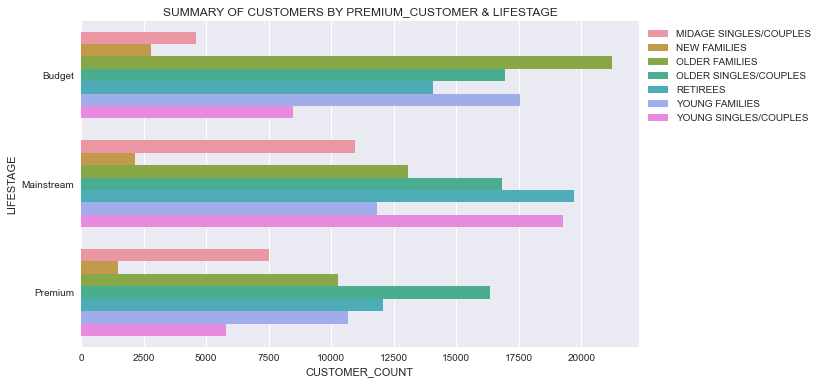

In [52]:
# Plotting the Bar Chart

plt.figure(figsize=(10, 6))
sns.barplot(x='CUSTOMER_COUNT', y='PREMIUM_CUSTOMER', hue='LIFESTAGE', data=summary_count)

# Adding labels and title

plt.xlabel('CUSTOMER_COUNT')
plt.ylabel('LIFESTAGE')
plt.title('SUMMARY OF CUSTOMERS BY PREMIUM_CUSTOMER & LIFESTAGE')

# Move the legend outside of the plot

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot

plt.show()

In [53]:
# Calculate average units per customer by LIFESTAGE and PREMIUM_CUSTOMER

avg_units = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

# Sort the DataFrame by average units in descending order

avg_units = avg_units.reset_index().sort_values(by=0, ascending=False)

# Rename the unnamed column as AVG_UNIT_PER_CUSTOMER

avg_units = avg_units.rename(columns={0: 'AVG_UNIT_PER_CUSTOMER'})

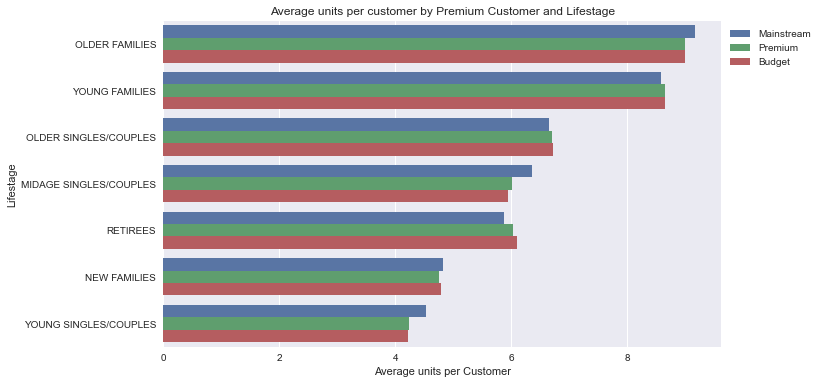

In [54]:
# Plotting the Horizontal Bar Chart for the Average unit per Customer

plt.figure(figsize=(10, 6))
sns.barplot(x='AVG_UNIT_PER_CUSTOMER', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_units, orient='h')
plt.xlabel('Average units per Customer')
plt.ylabel('Lifestage')
plt.title('Average units per customer by Premium Customer and Lifestage')

# Move the legend outside of the plot

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show Plot

plt.show()

In [55]:
# Calculate average price per unit sold

merged_df['PROD_UNIT_PRICE'] = merged_df['TOT_SALES'] / merged_df['PROD_QTY']

# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER' and calculate the average sale price

avg_price_per_unit = merged_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PROD_UNIT_PRICE'].mean()

# Rename the unnamed column as AVG_UNIT_PER_CUSTOMER

avg_price_per_unit = avg_price_per_unit.rename('AVG_PRICE_PER_UNIT')

# Convert avg_price_per_unit Series to DataFrame

avg_price_per_unit_df = avg_price_per_unit.reset_index()

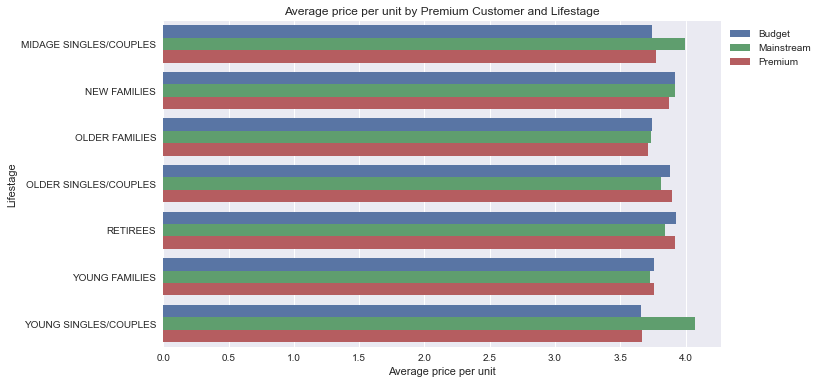

In [56]:
# Plotting the Horizontal Bar Chart for the Average Price per unit sold

plt.figure(figsize=(10, 6))
sns.barplot(x='AVG_PRICE_PER_UNIT', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_price_per_unit_df, orient='h')
plt.xlabel('Average price per unit')
plt.ylabel('Lifestage')
plt.title('Average price per unit by Premium Customer and Lifestage')

# Move the legend outside of the plot

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


# Show Plot
plt.show()

In [57]:
# Filter the data for the three groups

group1 = merged_df[merged_df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']) & (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')]['PROD_UNIT_PRICE']

group2 = merged_df[merged_df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']) & (merged_df['PREMIUM_CUSTOMER'] == 'Premium')]['PROD_UNIT_PRICE']

group3 = merged_df[merged_df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']) & (merged_df['PREMIUM_CUSTOMER'] == 'Budget')]['PROD_UNIT_PRICE']

In [58]:
# Perform the t-test

t_statistic1, p_value1 = stats.ttest_ind(group1, group2, equal_var=False)
t_statistic2, p_value2 = stats.ttest_ind(group1, group3, equal_var=False)
t_statistic3, p_value3 = stats.ttest_ind(group2, group3, equal_var=False)

In [59]:
# Show the t-statistic and p-value betweeen group1 & group2 as well as group1 & group2 since thats where we are focused

print(t_statistic1, p_value1)
print(t_statistic2, p_value2)

28.363346932943696 4.774740149493387e-174
31.694702054822432 7.193611544350693e-216


In [60]:
# Finding out if the difference in average price per unit amongst the stated groups is statistically significant 

alpha = 0.05  # significance level

if p_value1 < alpha and p_value2 < alpha:
    print("The difference in average price per unit between group1 vs group2 and group3 is statistically significant.")
else:
    print("The difference in average price per unit between group1 vs group2 and group3 is not statistically significant.")


The difference in average price per unit between group1 vs group2 and group3 is statistically significant.


In [61]:
# Filter the dataframe for the Mainstream, young singles/couples customer segments and also for the Other Customer segments

segment1 = merged_df[(merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')]

other = merged_df[~((merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream'))]

In [62]:
# Quantity Purchased by segment1 (Mainstream, young singles/couples customer segments)

quantity_segment1 = segment1['PROD_QTY'].sum()

# Quantity Purchased by other (Other Customer segments)

quantity_other = other['PROD_QTY'].sum()

In [63]:
# Group the quantities purchased by segment1 by the brand name

quantity_segment1_by_brand = segment1.groupby('BRAND_NAME')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1

# Group the quantities purchased by other by the brand name

quantity_other_by_brand = other.groupby('BRAND_NAME')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / quantity_other

In [64]:
# Merge both customer segments 

brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND_NAME')
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']


In [65]:
# Brand affinity of Mainstream Young Single/Couples compared to the rest of the population

brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

In [66]:
brand_proportions

,BRAND_NAME,PROD_QTY_x,targetSegment,PROD_QTY_y,other,affinityToBrand
17,Tyrrells,1143,0.032031,11155,0.026020,1.231033
16,Twisties,1673,0.046884,16445,0.038359,1.222236
5,Doritos,4447,0.124622,43884,0.102362,1.217458
8,Kettle,7172,0.200986,71879,0.167662,1.198758
15,Tostitos,1645,0.046099,16489,0.038462,1.198574
9,Pringles,4326,0.121231,43693,0.101917,1.189509
4,Cobs Popd,1617,0.045314,16954,0.039546,1.145858
7,Infuzions,1802,0.050499,19317,0.045058,1.120749
14,Thins,2187,0.061288,24742,0.057712,1.061957
3,Cheezels,651,0.018243,8096,0.018884,0.966059


In [67]:
# Display the top 5 brands mostly to be bought by the customer segment targeted.

print(f"The Top 5 Brands mostly likely to be purchased by Mainstream, Young Singles/Couples customer segment are:\n\n{brand_proportions['BRAND_NAME'][:5]}")

The Top 5 Brands mostly likely to be purchased by Mainstream, Young Singles/Couples customer segment are:

17    Tyrrells
16    Twisties
5      Doritos
8       Kettle
15    Tostitos
Name: BRAND_NAME, dtype: object


In [68]:
# Group the quantities purchased by segment1 by the pack size

quantity_segment1_by_pack_size = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_pack_size['targetSegment'] = quantity_segment1_by_pack_size['PROD_QTY'] / quantity_segment1

# Group the quantities purchased by other also by the pack size

quantity_other_by_pack_size = other.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_other_by_pack_size['other'] = quantity_other_by_pack_size['PROD_QTY'] / quantity_other

# Merge both customer segments 

pack_size_proportions = pd.merge(quantity_segment1_by_pack_size, quantity_other_by_pack_size, on='PACK_SIZE')
pack_size_proportions['affinityToPacksize'] = pack_size_proportions['targetSegment'] / pack_size_proportions['other']

In [69]:
# Pack Size affinity of Mainstream Young Single/Couples compared to the rest of the population

pack_size_proportions = pack_size_proportions.sort_values(by='affinityToPacksize', ascending=False)

In [70]:
pack_size_proportions

,PACK_SIZE,PROD_QTY_x,targetSegment,PROD_QTY_y,other,affinityToPacksize
15,270g,1153,0.032311,10896,0.025416,1.271321
17,380g,1165,0.032648,11108,0.025910,1.260037
16,330g,2220,0.062213,21779,0.050801,1.224639
2,134g,4326,0.121231,43693,0.101917,1.189509
0,110g,3309,0.092731,33526,0.078202,1.185791
12,210g,1055,0.029565,10907,0.025441,1.162091
3,135g,535,0.014993,5677,0.013242,1.132213
14,250g,520,0.014572,5549,0.012943,1.125853
7,170g,2926,0.081998,35162,0.082018,0.999756
4,150g,5709,0.159988,70953,0.165502,0.966679


In [71]:
# Display the top 5 pack size mostly to be bought by the customer segment targeted.

print(f"The Top 5 pack size mostly likely to be purchased by Mainstream, Young Singles/Couples customer segment are:\n\n{pack_size_proportions['PACK_SIZE'][:5]}")

The Top 5 pack size mostly likely to be purchased by Mainstream, Young Singles/Couples customer segment are:

15    270g
17    380g
16    330g
2     134g
0     110g
Name: PACK_SIZE, dtype: object


In [72]:
# Interpretation of the Brand Affinity analysis output for Mainstream, Young Singles/Couples

print("From the analysis, we can interpret the results as follows:\n")

print('''* Brands and Pack sizes with higher values in the affinityToBrand and affinityToPacksize 
columns have a higher affinity to the target segment which is the mainstream,young single/couples compared to the rest of the population.\n''')

From the analysis, we can interpret the results as follows:

* Brands and Pack sizes with higher values in the affinityToBrand and affinityToPacksize 
columns have a higher affinity to the target segment which is the mainstream,young single/couples compared to the rest of the population.

